# Examples for running FLORIS with the curled wake model

In [1]:
# load modules
from floris.floris import Floris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Setup floris and process input file

In [2]:
floris = Floris('example_input.json')

## Change the wake model

In [3]:
floris.farm.set_wake_model('curl') # Possible options include 'curl', 'gauss', 'jensen', and 'floris'

## Calculate Wake

In [4]:
import time

t1 = time.time()

floris.farm.flow_field.calculate_wake()

t2 = time.time()

print('Time to compute wake = ', t2-t1, 's')

Time to compute wake =  13.56006646156311 s


## Compute Velocities at each Turbine

In [5]:
for coord, turbine in floris.farm.turbine_map.items():
    print(str(coord) + ":")
    print("\tCp -", turbine.Cp)
    print("\tCt -", turbine.Ct)
    print("\tpower -", turbine.power)
    print("\tai -", turbine.aI)
    print("\taverage velocity -", turbine.get_average_velocity())
    print("\tyaw angle -", np.degrees(turbine.yaw_angle))

(0.0, 0.0):
	Cp - 0.46328739380548106
	Ct - 0.7661167268371584
	power - 1714019.4871475366
	ai - 0.2581926008354781
	average velocity - 7.8537318518370105
	yaw angle - 0.0
(800.0, 0.0):
	Cp - 0.4617012992165447
	Ct - 0.800180831698805
	power - 1085695.9571881793
	ai - 0.2764943131030024
	average velocity - 6.752584379513541
	yaw angle - 0.0
(0.0, 630.0):
	Cp - 0.46328739380548106
	Ct - 0.7661167268371584
	power - 1714019.4871475366
	ai - 0.2581926008354781
	average velocity - 7.8537318518370105
	yaw angle - 0.0
(800.0, 630.0):
	Cp - 0.4616759438225675
	Ct - 0.8007085047212761
	power - 1078359.2228645755
	ai - 0.27678961982093897
	average velocity - 6.737462830063584
	yaw angle - 0.0


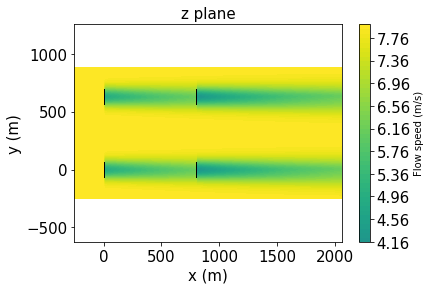

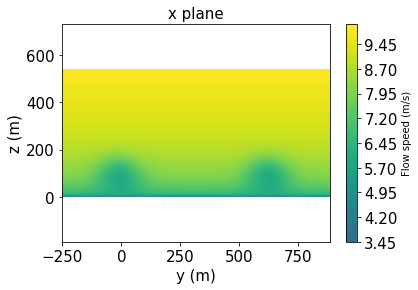

In [6]:
# Visualization
from copy import deepcopy
from floris.visualization import VisualizationManager

ff_viz = deepcopy(floris.farm.flow_field)
visualization_manager = VisualizationManager(ff_viz)
visualization_manager.plot_z_planes([1/6])
visualization_manager.plot_x_planes([0.4])

## Change the lead turbine yaw angles

In [7]:
for i, turb in enumerate(floris.farm.turbines):
    if i == 0 or i == 2:
        turb.set_yaw_angle(20)

## Re-calculate the wake

In [8]:
t1 = time.time()

floris.farm.flow_field.calculate_wake()

t2 = time.time()

print('Time to compute wake = ', t2-t1, 's')

Time to compute wake =  13.704463005065918 s


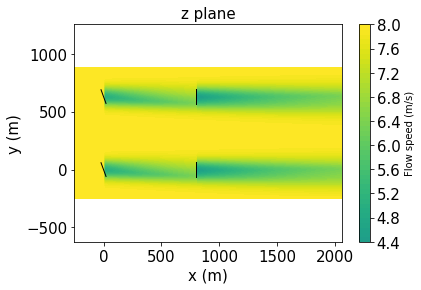

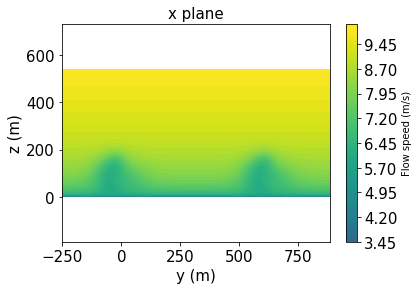

In [9]:
# Visualization
from copy import deepcopy
from floris.visualization import VisualizationManager

ff_viz = deepcopy(floris.farm.flow_field)
visualization_manager = VisualizationManager(ff_viz)
visualization_manager.plot_z_planes([1/6])
visualization_manager.plot_x_planes([0.4])

## Add another farm for comparison

In [10]:
floris.add_farm(floris.input_file) # Use input file to load a farm with same details

In [11]:
floris.list_farms()

Farm 0
	Description: Example 2x2 Wind Farm
	Wake Model: curl
	Deflection Model: curl
Farm 1
	Description: Example 2x2 Wind Farm
	Wake Model: curl
	Deflection Model: curl


## Calculate wake for second farm

In [12]:
# t1 = time.time()

# floris.farm[1].flow_field.calculate_wake()

# t2 = time.time()

# print('Time to compute wake = ', t2-t1, 's')

In [13]:
# # Visualization
# from copy import deepcopy
# from floris.visualization import VisualizationManager

# ff_viz = deepcopy(floris.farm[1].flow_field)
# visualization_manager = VisualizationManager(ff_viz)
# visualization_manager.plot_z_planes([1/6])
# visualization_manager.plot_x_planes([0.4])

In [14]:
# # Visualization
# from copy import deepcopy
# from floris.visualization import VisualizationManager

# ff_viz = deepcopy(floris.farm[0].flow_field)
# visualization_manager = VisualizationManager(ff_viz)
# visualization_manager.plot_z_planes([1/6])
# visualization_manager.plot_x_planes([0.4])

In [15]:
# for num, val in enumerate(floris.farm):
#     t1 = time.time()
#     floris.farm[num].flow_field.calculate_wake()
#     t2 = time.time()

#     print('Time to compute wake = ', t2-t1, 's')

In [16]:
# floris.farm.set_description('Test gauss farm')

## Optimize Wind Farm using Wake Steering 

In [17]:
from floris.optimization import wake_steering
import numpy as np
import time

t1 = time.time()

# run FLORIS with no yaw
turbines    = [turbine for _, turbine in floris.farm[0].flow_field.turbine_map.items()]
for k,turbine in enumerate(turbines):
    turbine.yaw_angle = 0.0
floris.farm[0].flow_field.calculate_wake()
power_initial = np.sum([turbine.power for turbine in turbines])  # determine initial power production

# for i, turb in enumerate(floris.farm[0].turbines):
#     if i == 0:
#         turb.set_yaw_angle(17)
#     if i == 2:
#         turb.set_yaw_angle(17.9)

# number of turbines
nTurbs = len(turbines)

# set bounds for the optimization on the yaw angles (deg)
minimum_yaw_angle = 0.0
maximum_yaw_angle = 25.0

# compute the optimal yaw angles
opt_yaw_angles = wake_steering(floris.farm[0],minimum_yaw_angle,maximum_yaw_angle, maxiter=15, verbose=True, minimize_method='L-BFGS-B')

print('Optimal yaw angles for:')
for i,yaw in enumerate(opt_yaw_angles):
    print('Turbine ', i, ' yaw angle = ', np.degrees(yaw))
    
t2 = time.time()

print('Time to compute wake = ', t2-t1, 's')

Optimizing wake redirection control...
Number of parameters to optimize = 4
yaw angles are:  [0. 0. 0. 0.]
powers are:  [1714019.4871475366, 1085695.9571881793, 1714019.4871475366, 1078359.2228645755]
total power is:  -5592094.154347828
yaw angles are:  [5. 0. 0. 0.]
powers are:  [1701777.9811564798, 1096052.758166595, 1714019.4871475366, 1078359.2228645755]
total power is:  -5590209.449335188
yaw angles are:  [0. 5. 0. 0.]
powers are:  [1714019.4871475366, 1077941.9300816946, 1714019.4871475366, 1078359.2228645755]
total power is:  -5584340.127241343
yaw angles are:  [0. 0. 5. 0.]
powers are:  [1714019.4871475366, 1085695.9571881793, 1701777.9811564798, 1088345.5875269535]
total power is:  -5589839.013019149
yaw angles are:  [0. 0. 0. 5.]
powers are:  [1714019.4871475366, 1085695.9571881793, 1714019.4871475366, 1070657.5946239443]
total power is:  -5584392.526107196
No change in controls suggested for this inflow condition...
Optimal yaw angles for:
Turbine  0  yaw angle =  0.0
Turbin

## Calculate Power Gain

In [18]:
# assign yaw angles to turbines
turbines    = [turbine for _, turbine in floris.farm[0].flow_field.turbine_map.items()]
for i,turbine in enumerate(turbines):
    turbine.yaw_angle = opt_yaw_angles[i]
    
# compute the new wake with yaw angles
floris.farm[0].flow_field.calculate_wake()

# optimal power 
power_opt = np.sum([turbine.power for turbine in turbines]) 

print('Power increased by ', 100*(power_opt-power_initial)/power_initial, '%')

Power increased by  0.0 %


In [19]:
from floris.optimization import optimize_plant

In [20]:
optimize_plant(opt_yaw_angles, floris.farm[0])

yaw angles are:  [0. 0. 0. 0.]
powers are:  [1714019.4871475366, 1085695.9571881793, 1714019.4871475366, 1078359.2228645755]
total power is:  -5592094.154347828


-5592.0941543478275

In [21]:
yaw_angles = [[0, 0, 0, 0], [10, 0, 0, 0], [20, 0, 0, 0]]
power_opt = []

for j,val in enumerate(yaw_angles):
    # assign yaw angles to turbines
    turbines    = [turbine for _, turbine in floris.farm[0].flow_field.turbine_map.items()]
    for i,turbine in enumerate(turbines):
        turbine.yaw_angle = np.radians(yaw_angles[j][i])

    # compute the new wake with yaw angles
    floris.farm[0].flow_field.calculate_wake()
    
    for coord, turbine in floris.farm[0].turbine_map.items():
        print(str(coord) + ":")
        print("\tCp -", turbine.Cp)
        print("\tCt -", turbine.Ct)
        print("\tpower -", turbine.power)
        print("\tai -", turbine.aI)
        print("\taverage velocity -", turbine.get_average_velocity())
        print("\tyaw angle -", np.degrees(turbine.yaw_angle))

    # optimal power 
    power_opt.append(np.sum([turbine.power for turbine in turbines]))
    print(j+1,' of ', len(yaw_angles), ' runs completed.')

(0.0, 0.0):
	Cp - 0.46328739380548106
	Ct - 0.7661167268371584
	power - 1714019.4871475366
	ai - 0.2581926008354781
	average velocity - 7.8537318518370105
	yaw angle - 0.0
(800.0, 0.0):
	Cp - 0.4617012992165447
	Ct - 0.800180831698805
	power - 1085695.9571881793
	ai - 0.2764943131030024
	average velocity - 6.752584379513541
	yaw angle - 0.0
(0.0, 630.0):
	Cp - 0.46328739380548106
	Ct - 0.7661167268371584
	power - 1714019.4871475366
	ai - 0.2581926008354781
	average velocity - 7.8537318518370105
	yaw angle - 0.0
(800.0, 630.0):
	Cp - 0.4616759438225675
	Ct - 0.8007085047212761
	power - 1078359.2228645755
	ai - 0.27678961982093897
	average velocity - 6.737462830063584
	yaw angle - 0.0
1  of  3  runs completed.
(0.0, 0.0):
	Cp - 0.46328739380548106
	Ct - 0.7661167268371584
	power - 1665392.0919217523
	ai - 0.25614030864163645
	average velocity - 7.8537318518370105
	yaw angle - 10.0
(800.0, 0.0):
	Cp - 0.46178766709023655
	Ct - 0.7983834233447321
	power - 1110938.6538658494
	ai - 0.2754913

In [22]:
print(power_opt)

[5592094.154347828, 5568709.455799714, 5463911.546927169]


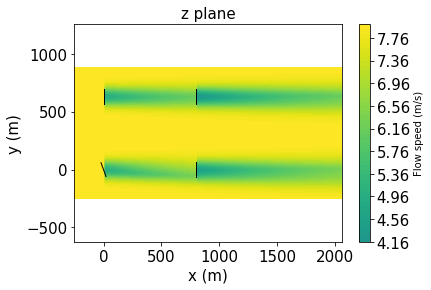

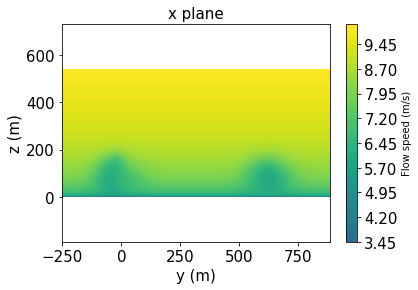

In [23]:
# Visualization
from copy import deepcopy
from floris.visualization import VisualizationManager

ff_viz = deepcopy(floris.farm[0].flow_field)
visualization_manager = VisualizationManager(ff_viz)
visualization_manager.plot_z_planes([1/6])
visualization_manager.plot_x_planes([0.4])